In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [3]:
data = pd.read_csv("NORMAL_DLY_sample_csv.csv")

In [4]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')
data['TAVG'] = ((data['DLY-TMIN-NORMAL']/10) + (data['DLY-TMAX-NORMAL']/10)) / 2
data['PRCP'] = (data['MTD-PRCP-NORMAL'] / 254).fillna(0)

In [5]:
def classify_weather(row):
    if (row['DLY-TMAX-NORMAL']/10) > 80:
        return "Extreme_Heat"
    elif (row['DLY-TMIN-NORMAL']/10) < 20:
        return "Extreme_Cold"
    elif row['PRCP'] > 1:
        return "Heavy_Rain"
    else:
        return "Normal"

In [6]:
data['Label'] = data.apply(classify_weather, axis=1)

In [7]:
print(data['Label'].value_counts())

Label
Normal          195
Extreme_Cold    138
Extreme_Heat     19
Heavy_Rain       13
Name: count, dtype: int64


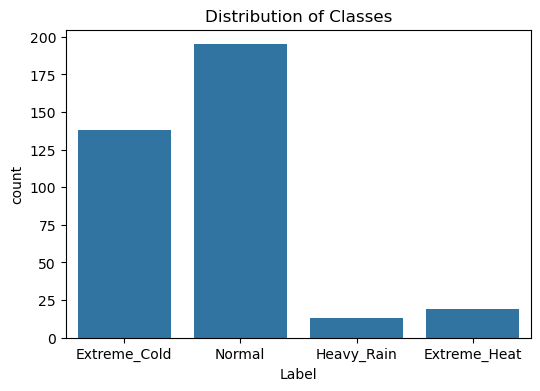

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=data)
plt.title("Distribution of Classes")
plt.show()

# This graph shows that while most days are labeled as “Normal,” extreme cold days are also fairly common, whereas extreme heat and heavy rain days are much less frequent.

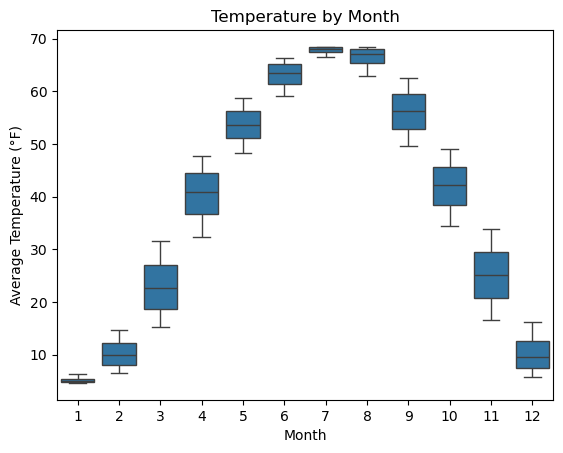

In [9]:
sns.boxplot(x=data['DATE'].dt.month, y='TAVG', data=data)
plt.title("Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°F)")
plt.show()

# The boxplot highlights clear seasonal patterns, with higher average temperatures in summer months and lower temperatures in winter months.

In [10]:
X = data[['DLY-TMIN-NORMAL', 'DLY-TMAX-NORMAL', 'PRCP']] / 10
y = data['Label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [14]:
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Results:
              precision    recall  f1-score   support

Extreme_Cold       0.95      1.00      0.98        41
Extreme_Heat       0.24      0.83      0.37         6
  Heavy_Rain       0.80      1.00      0.89         4
      Normal       1.00      0.69      0.82        59

    accuracy                           0.83       110
   macro avg       0.75      0.88      0.76       110
weighted avg       0.93      0.83      0.86       110



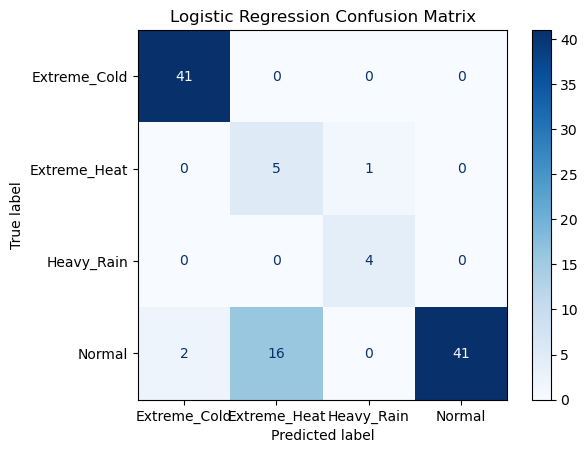

In [15]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# The confusion matrix shows that Logistic Regression predicts normal days well but struggles with the less frequent extreme categories.

In [16]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [17]:
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

Extreme_Cold       0.98      1.00      0.99        41
Extreme_Heat       1.00      0.83      0.91         6
  Heavy_Rain       1.00      1.00      1.00         4
      Normal       0.98      0.98      0.98        59

    accuracy                           0.98       110
   macro avg       0.99      0.95      0.97       110
weighted avg       0.98      0.98      0.98       110



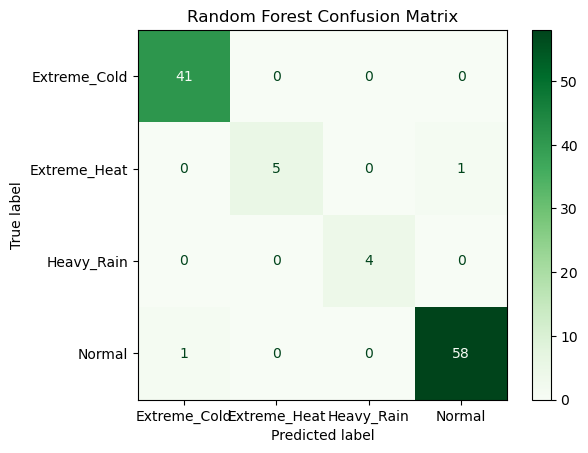

In [18]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

# The Random Forest performs better across categories, correctly identifying more extreme events compared to Logistic Regression.

In [19]:
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [20]:
print(f"Logistic Regression Accuracy: {acc_log:.2f}")
print(f"Random Forest Accuracy: {acc_rf:.2f}")

Logistic Regression Accuracy: 0.83
Random Forest Accuracy: 0.98
